# Finite Element Analysis [ME335A]

### Problem 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
J = 1.0

In [3]:
def hamiltonian(spin_configs, J):
  hh = np.zeros(spin_configs.shape[0])
  for i in range(spin_configs.shape[1]-1):
    hh = hh + spin_configs[:, i] * spin_configs[:, i+1]
  return -J * hh

In [4]:
spin_configs = np.array(list(itertools.product([1, -1], repeat=6)))

In [5]:
H = hamiltonian(spin_configs, J)

In [6]:
sigma_A = 2 * (np.sum(spin_configs[:, 0:3], axis=1) > 0).astype(int) - 1
sigma_B = 2 * (np.sum(spin_configs[:, 3:6], axis=1) > 0).astype(int) - 1
group_spin_configs = np.column_stack((sigma_A, sigma_B))

In [7]:
idx_pp = np.where((sigma_A == +1) & (sigma_B == +1))[0]
idx_pn = np.where((sigma_A == +1) & (sigma_B == -1))[0]
idx_np = np.where((sigma_A == -1) & (sigma_B == +1))[0]
idx_nn = np.where((sigma_A == -1) & (sigma_B == -1))[0]

In [8]:
print(H[idx_pp])
print(H[idx_pn])

[-5. -3. -1. -1. -1.  1.  3. -1. -1.  1.  3.  3. -3. -1.  1.  1.]
[-3.  1. -1. -3.  1.  1. -1. -3.  1.  5.  3.  1. -1.  3.  1. -1.]


In [13]:
beta_J = np.linspace(0, 2, 1000)
left_side = (2*np.sinh(5*beta_J) - 2*np.sinh(3*beta_J) + 4*np.sinh(beta_J)) / \
            (2*np.cosh(5*beta_J) + 10*np.cosh(3*beta_J) + 20*np.cosh(beta_J))
left_side = np.arctanh(left_side)
right_side = beta_J

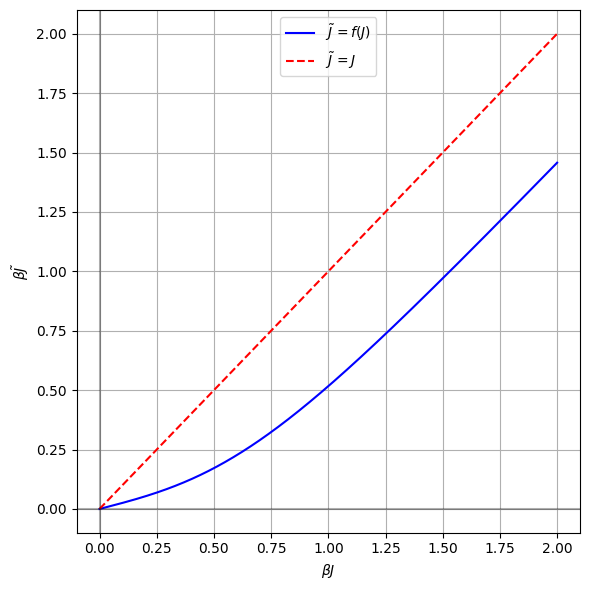

In [14]:
plt.figure(figsize=(6, 6))
plt.plot(beta_J, left_side, 'b-', label=r'$\tilde J = f(J)$')
plt.plot(beta_J, right_side, 'r--', label=r'$\tilde J = J$')

plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel(r'$\beta J$')
plt.ylabel(r'$\beta \tilde J$')
# plt.title('Verification of Hyperbolic Function Equality')
plt.legend()
# plt.ylim(-1.5, 1.5)
plt.tight_layout()
plt.show()